# Asignación y normalización de labels

En este notebook se procederá:
1. En primer lugar, a asignar las labels -sin normalizar- a las distintas imágenes.
2. Una vez las labels han sido correctametne asignadas, procederán a normalizarse.

In [1]:
import utils.yolo_fun as yolo_fun
import utils.img_fun as img_fun
import os
import pandas as pd
from tqdm import tqdm  
import rasterio



### Consultamos las dimensiones de la imagen que vayamos a recortar

In [2]:
# Selección de la imagen
NUM_TILE = 24
image_path  = 'G:\\.shortcut-targets-by-id\\1pYgV5EIk4-LapLNhlCwpQaDAzuqNffXG\\doctorado_albert\\conteo_pinguinos\\recortes'
image_name = f"recorte_{NUM_TILE}.tif"
full_image_path = os.path.join(image_path, image_name)

# Marcamos el ancho y alto de la imagen- utilizamos la función desde utils.img_fun
width, height = img_fun.get_width_height(full_image_path)


# Cargamos el archivo CSV con las coordenadas SIN normalizar y procedemos a generar los txt
csv_file = "coords/yolo_coords.csv" 
image_dir = f"cut_tiles/tiles_500x500_{NUM_TILE}" 
output_dir = "coords/labels_sin_normalizar" 

# Consultar la función en utils/functions.py
yolo_fun.generar_txt_yolo(image_dir=image_dir, csv_file=csv_file, output_dir=output_dir)


Hello, world!
Ancho: 10195 píxeles
Alto: 11420 píxeles


### Normalizamos las labels

Para cara archivo en txt, será necesario normalizarlo para que pueda ser leido por yolo. Los archivos normalizados pasarán a la carpeta labels_normalized. Una vez estén en esta caqrpeta, podremos pasar al paso número 5 (jungar cada label con su imagen correspondiente dentro de la carpeta dataset).

In [54]:
coords_sin_normalizar = "coords/labels_sin_normalizar"
coords_normalized = "coords/labels_normalized"


for file in os.listdir(coords_sin_normalizar):
    coords_file = os.path.join(coords_sin_normalizar, file)
    output_file = os.path.join(coords_normalized, file)
    
    # Consultar la función en utils/functions.py
    yolo_fun.normalize_yolo_coords(
        tiff_file=full_image_path,
        txt_file_coords=coords_file, 
        output_file=output_file, 
    )

### Visualización de la caja normalizada

Metadata:
---------
driver: GTiff
dtype: uint8
nodata: None
width: 509
height: 571
count: 4
crs: EPSG:4326
transform: | 0.00, 0.00,-59.23|
| 0.00,-0.00,-62.29|
| 0.00, 0.00, 1.00|
blockxsize: 509
blockysize: 4
tiled: False
interleave: pixel

Coordenadas de las esquinas de la imagen:
TOP LEFT: (-59.226411237138784, -62.28973942221874)
BOTTOM RIGHT: (-59.22614886087278, -62.28987643252674)


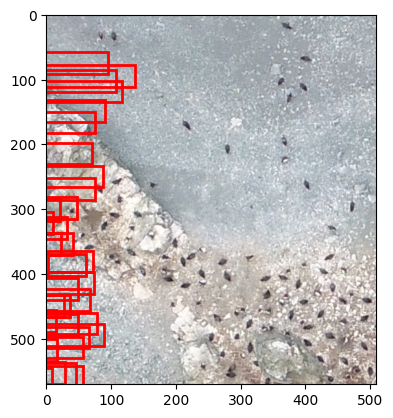

In [2]:
import utils.yolo_fun as yolo_fun
import utils.img_fun as img_fun
import os
import pandas as pd
from tqdm import tqdm  
import rasterio

TILE = 13
NUM = 379

imagen_path = os.path.join('cut_tiles', f"tile_{TILE}_subrecorte_{NUM}.tiff")
coords_file = os.path.join('coords', 'labels_normalized' ,f"tile_{TILE}_subrecorte_{NUM}.txt")
coords = pd.read_csv(coords_file, header=None, sep=" ")
img_info = img_fun.get_img_info(imagen_path)

ancho_imagen = img_info["width"]
alto_imagen = img_info["height"]



yolo_fun.visualizar_cajas(imagen_path, coords, ancho_imagen, alto_imagen)

Metadata:
---------
driver: GTiff
dtype: uint8
nodata: None
width: 10195
height: 11420
count: 4
crs: EPSG:4326
transform: | 0.00, 0.00,-59.23|
| 0.00,-0.00,-62.29|
| 0.00, 0.00, 1.00|
blockxsize: 10195
blockysize: 1
tiled: False
interleave: pixel

Coordenadas de las esquinas de la imagen:
TOP LEFT: (-59.231134009926784, -62.287273236674736)
BOTTOM RIGHT: (-59.22587875249678, -62.290013442834734)


c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:3218: DecompressionBombWarning: Image size (116426900 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
c:\Users\Administrador.CRISASUSESTUDIO\Desktop\projects\CountingPenguins\utils\yolo_fun.py:192: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_center = row[1]  # Columna 1 es x
c:\Users\Administrador.CRISASUSESTUDIO\Desktop\projects\CountingPenguins\utils\yolo_fun.py:193: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_center = row[2]  # Columna 2 es y


Esquinas de la caja:
  - Esquina superior izquierda: (-74.2270489573, -77.28932954929999)
  - Esquina inferior derecha: (-44.2270489573, -47.28932954929999)
¡La caja está fuera de los límites de la imagen!
Esquinas de la caja:
  - Esquina superior izquierda: (-74.22703012950001, -77.28932878)
  - Esquina inferior derecha: (-44.22703012950001, -47.289328780000005)
¡La caja está fuera de los límites de la imagen!
Esquinas de la caja:
  - Esquina superior izquierda: (-74.2270864596, -77.28933210049999)
  - Esquina inferior derecha: (-44.2270864596, -47.28933210049999)
¡La caja está fuera de los límites de la imagen!
Esquinas de la caja:
  - Esquina superior izquierda: (-74.22707041620001, -77.289335421)
  - Esquina inferior derecha: (-44.22707041620001, -47.289335421000004)
¡La caja está fuera de los límites de la imagen!
Esquinas de la caja:
  - Esquina superior izquierda: (-74.2270878857, -77.2893433902)
  - Esquina inferior derecha: (-44.2270878857, -47.2893433902)
¡La caja está fuera 

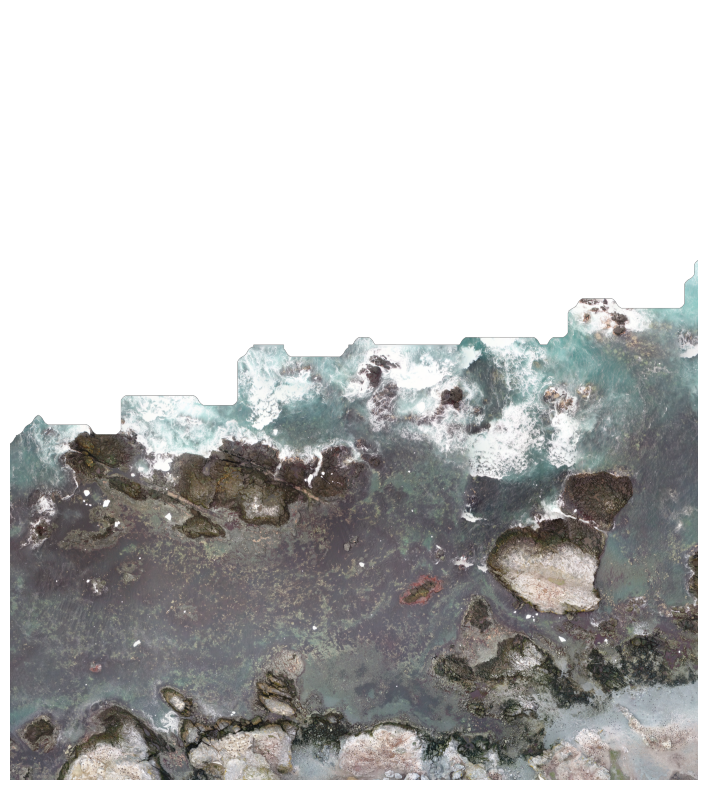

In [8]:
import utils.yolo_fun as yolo_fun
import utils.img_fun as img_fun
import os
import pandas as pd
from tqdm import tqdm  
import rasterio

TILE = 13
NUM = 379


image_path  = 'G:\\.shortcut-targets-by-id\\1pYgV5EIk4-LapLNhlCwpQaDAzuqNffXG\\doctorado_albert\\conteo_pinguinos\\recortes'
image_name = f"recorte_{TILE}.tif"
imagen_path = os.path.join(image_path, image_name)
coords_file = os.path.join('coords', 'coords_per_tile', f"coords_{TILE}.csv")

# imagen_path = os.path.join('cut_tiles', f"tile_{TILE}_subrecorte_{NUM}.tiff")
# coords_file = os.path.join('coords', 'labels_sin_normalizar' ,f"tile_{TILE}_subrecorte_{NUM}.txt")
coords = pd.read_csv(coords_file)
img_info = img_fun.get_img_info(imagen_path)

ancho_imagen = img_info["width"]
alto_imagen = img_info["height"]

yolo_fun.draw_boxes(imagen_path, coords)

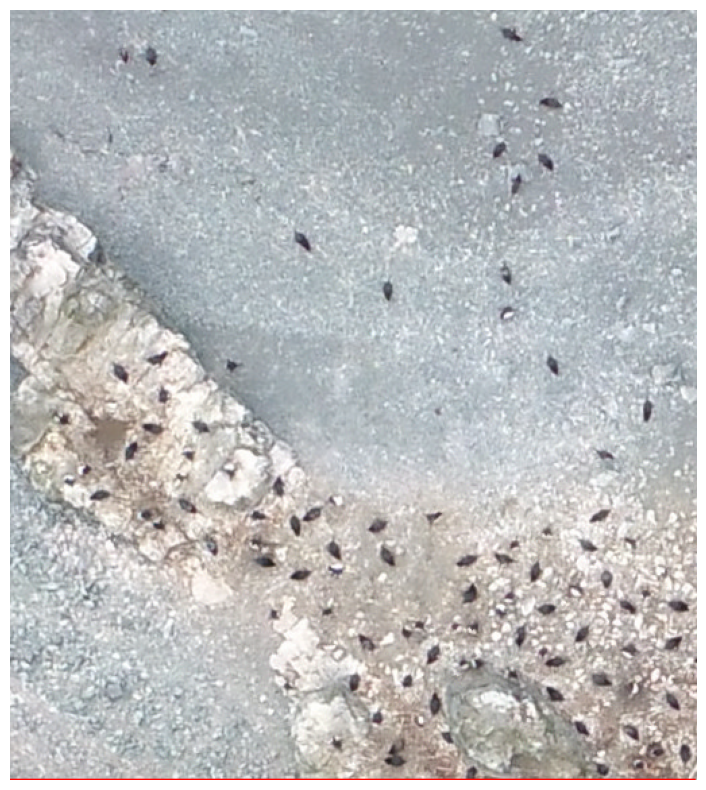

In [4]:
import os
import pandas as pd
import rasterio
import numpy as np
import matplotlib.pyplot as plt

TILE = 13
NUM = 379

# Cargar las coordenadas desde el archivo de texto
coords_file = os.path.join('coords', 'labels_sin_normalizar', f"tile_{TILE}_subrecorte_{NUM}.txt")
coords = pd.read_csv(coords_file, header=None, sep=" ")

# Abrir el archivo TIFF con rasterio
tiff_file = os.path.join('cut_tiles', f"tile_{TILE}_subrecorte_{NUM}.tiff")
with rasterio.open(tiff_file) as src:
    image = src.read()  # Lee las bandas de la imagen (dimensiones: [bandas, altura, ancho])
    transform = src.transform  # Obtiene la transformación de coordenadas (escala y desplazamiento)
    height, width = image.shape[1], image.shape[2]  # Obtener las dimensiones de la imagen

# Crear una copia de la imagen para modificarla
image_with_squares = image.copy()

# Ajuste de coordenadas (aquí asumimos que las coordenadas son [x_center, y_center, width, height])
for _, row in coords.iterrows():
    lat = row[1]  # Latitud (y_center)
    lon = row[2]  # Longitud (x_center)
    width_box = row[3]  # Ancho del cuadro
    height_box = row[4]  # Alto del cuadro
    
    # Convertir las coordenadas de latitud y longitud a píxeles en la imagen
    # Esto se hace utilizando la matriz de transformación 'transform'
    top_left_x, top_left_y = ~transform * (lon - width_box / 2, lat - height_box / 2)  # Esquina superior izquierda
    bottom_right_x, bottom_right_y = ~transform * (lon + width_box / 2, lat + height_box / 2)  # Esquina inferior derecha
    
    # Asegúrate de que las coordenadas estén dentro de los límites de la imagen
    top_left_x, top_left_y = int(top_left_x), int(top_left_y)
    bottom_right_x, bottom_right_y = int(bottom_right_x), int(bottom_right_y)
    
    top_left_x = max(0, min(top_left_x, width - 1))
    top_left_y = max(0, min(top_left_y, height - 1))
    bottom_right_x = max(0, min(bottom_right_x, width - 1))
    bottom_right_y = max(0, min(bottom_right_y, height - 1))

    # Pintar los bordes de los cuadros en rojo (RGB)
    for x in range(top_left_x, bottom_right_x):
        image_with_squares[0, top_left_y, x] = 255  # Rojo (R)
        image_with_squares[1, top_left_y, x] = 0    # Verde (G)
        image_with_squares[2, top_left_y, x] = 0    # Azul (B)

    for x in range(top_left_x, bottom_right_x):
        image_with_squares[0, bottom_right_y - 1, x] = 255  # Rojo (R)
        image_with_squares[1, bottom_right_y - 1, x] = 0    # Verde (G)
        image_with_squares[2, bottom_right_y - 1, x] = 0    # Azul (B)

    for y in range(top_left_y, bottom_right_y):
        image_with_squares[0, y, top_left_x] = 255  # Rojo (R)
        image_with_squares[1, y, top_left_x] = 0    # Verde (G)
        image_with_squares[2, y, top_left_x] = 0    # Azul (B)

    for y in range(top_left_y, bottom_right_y):
        image_with_squares[0, y, bottom_right_x - 1] = 255  # Rojo (R)
        image_with_squares[1, y, bottom_right_x - 1] = 0    # Verde (G)
        image_with_squares[2, y, bottom_right_x - 1] = 0    # Azul (B)

# Mostrar la imagen con los cuadrados dibujados
plt.figure(figsize=(10, 10))
plt.imshow(np.transpose(image_with_squares, (1, 2, 0)))  # Convertir el formato (bandas, alto, ancho) a (alto, ancho, bandas)
plt.axis('off')  # Quitar los ejes
plt.show()
